# Week 1

Applications in supervised learning:
* Prediction of price or click on ad (yes/no) --> Standard NN
* From image to object (photo tagging) --> Convolutional NN 
* From audio to text trasncript (speech recognicion) --> Recurrent NN
* Translation from language to language --> More advanced RNN
* From image/radars to position of other cars (autonomous driving) --> Custom/Hybrid NN

Types of data:
* Structured data: databases
* Unstructured data: audio, images, text 

# Week 2

## Logistic regression as a NN

### Binary classification

Training sample $X \in \mathbb{R}^{n_X \times m}$, where $n_X$ is the number of features and $m$ is the number of observations

### Logistic regression

We want to estimate $\mathbb{E}[y|x] = P(y=1|x) = \hat{y} \in [0,1]$.
We set $\hat{y} = \sigma(w^Tx+b)$, the *sigmoid* function $\sigma(z) = \frac{1}{1+e^{-z}}$.

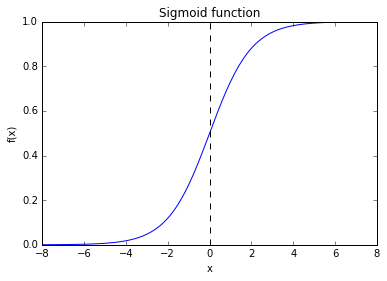

In [1]:
# the sigmoid function
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
x = np.arange(-8, 8, 0.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.axvline(x=0, ls = "--", c = 'black')
plt.axhline(y=1, c = 'black')
plt.axhline(y=0, c = 'black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Sigmoid function')
plt.show()

### Logistic regression cost function

Loss function $L(\hat{y},y):\mathbb{R}^m \rightarrow \mathbb{R}$ to measure how good our estimate is compared to the real $y$.

A quadratic function such as $\frac{1}{2}(\hat{y}-y)^2$ is not good for gradient discent.

We use $L(\hat{y},y) = -(y \ln(\hat{y}) +(1-y)\ln(1-\hat{y}))$:
* if $y=1 \implies L(\hat{y},y) = -\ln(\hat{y})$, therefore we minimize $L$ by choosig the $w$ and $b$ such that $\hat{y} \in (0,1)$ is as large as possible
* if $y=0 \implies L(\hat{y},y) = -\ln(1-\hat{y})$, therefore we want $\hat{y} \in (0,1)$ to be as small as possible

The cost function $J(w,b) = \frac{1}{m}\sum_{i=1}^{m} L(\hat{y}^i,y^i) = -\frac{1}{m}\sum_{i=1}^{m} \bigl[y^i \ln(\hat{y}^i) +(1-y^i)\ln(1-\hat{y}^i)\bigr]$ is convex.

Note: minimizing the cost funcion is equivalent to maximizing the log-likelihood function:

$\ln P(y_1,...y_m|w,b) = \ln \prod_{i=1}^m  P(y_i|x) = \sum_{i=1}^{m} \ln P(y_i|x) =  \sum_{i=1}^{m}  \ln (\hat{y}_i^{y_i}(1-\hat{y}_i)^{1-y_i})$

### Gradient discent

Consider $w^*,b^* = argmin_{w,b} J(w,b)$.

We find $w^*$ and $b^*$ by initializing some $(w^0,b^0)$ and by iterating

* $w^{t+1} = w^t - \alpha \frac{\partial J(w^t,b^t)}{\partial w^t}$, where $\alpha$ is the *learning rate*.
* $b^{t+1} = b^t - \alpha \frac{\partial J(w^t,b^t)}{\partial b^t}$

Because this function is convex, no matter where you initialize, you should get to the same point or roughly the same point. And what gradient descent does is it starts at that initial point and then takes a step in the steepest downhill direction.

We will denote $\partial x^t = \frac{\partial J(x^t)}{\partial x^t}$.

By the chain rule, we have that

$\partial w^t = \frac{\partial J(w^t,b^t)}{\partial w^t} = \frac{1}{m}\sum_{i=1}^{m} \frac{\partial L(\hat{y}_i,y_i)}{\partial \hat{y}_i} \frac{\partial \hat{y}_i}{\partial z_i} \frac{\partial z_i}{\partial w^t}$, where $\hat{y}_i = \sigma(z_i)$ and $z_i = w^Tx_i+b$.

By using the sigmoid function, we have that $\frac{\partial \hat{y}}{\partial z} = \frac{\partial (1+e^z)^{-1}}{\partial z} = \frac{e^{-z}}{(1+e^z)^2}$

Therefore $\partial z_i =  \frac{1}{m}\sum_{i=1}^{m} \frac{\partial L(\hat{y}_i,y_i)}{\partial \hat{y}_i}\frac{e^{-z_i}}{(1+e^{z_i})^2} = \frac{1}{m}\sum_{i=1}^{m} -\big(\frac{y_i}{\hat{y}_i} - \frac{1-y_i}{1-\hat{y}_i} \big) \frac{e^{-z_i}}{(1+e^{z_i})^2} = \frac{1}{m}\sum_{i=1}^{m} \hat{y}_i - y_i$.

Hence

$\partial w^t = -\frac{1}{m}\sum_{i=1}^{m} (y^i-\hat{y}^i) x^i$

and

$\partial b^t = -\frac{1}{m}\sum_{i=1}^{m} (y^i-\hat{y}^i)$.

# Week 3

## Shallow Neural Network

<img src="NN.PNG" width="400" />

For a single observation $i$, let $a^{[0]} = [x_1, x_2, \dots x_{n_x}]$ be the input layer.

Each node $j$  of the hidden layer is computed as $a^{[1]}_j = \sigma(z^{[1]}_j) = \sigma(w^{[1]T}_jx+b^{[1]}_j)$, therefore the hidden layer is based on a matrix of weights $W^{[1]}$ of dimension $n_x \times n_j$, where $n_j$ is the number of nodes of the hidden layer, and a vector $b^{[1]}$. The output layer is computed as $\hat{y} = a^{[2]} = \sigma(z^{[2]}) = \sigma(w^{[2]T} a^{[1]} + b^{[2]})$.

The function that maps from $z^{[l]}$ to $a^{[l]}$ is called *activation function*.

The number of units in each layer $l$ are denoted by $n^{[l]}$. We have $n^{[0]} = n_x$ and $n^{[2]} = 1$

Consider now the case where $m>1$, now the input layer $X = a^{[0]}$ has dimension $n_x \times m$. 

In the hidden layer there are $n^{[1]}$ units (for each observation). We compute $a^{[1]} = \sigma(z^{[1]})$ with $z^{[1]} = W^{[1]} X + b^{[1]}$ of dimension $n^{[1]} \times m$, where $W^{[1]}$ has dimension $n^{[1]} \times n_x$ and where for each observation of the same unit we sum a constant from $b^{[1]}$.

For the case with 2 features, 2 observations and 3 nodes we have:

$$
W^{[1]} X + b^{[1]} = \left(\begin{array}{cc} 
w_{11} & w_{12}\\
w_{21} & w_{22}\\
w_{31} & w_{32}
\end{array}\right)
\left(\begin{array}{cc} 
x^{(1)}_1 & x^{(2)}_1\\ 
x^{(1)}_2 & x^{(2)}_2
\end{array}\right)
+
\left(\begin{array}{cc}
b_1 & b_1\\
b_2 & b_2\\
b_3 & b_3
\end{array}\right)
=
\left(\begin{array}{cc} 
w_{11}x^{(1)}_1+w_{12}x^{(1)}_2+b_1 & w_{11}x^{(2)}_1+w_{12}x^{(2)}_1+b_1\\
w_{21}x^{(1)}_1+w_{22}x^{(1)}_2+b_2 & w_{21}x^{(2)}_1+w_{22}x^{(2)}_2+b_2\\
w_{31}x^{(1)}_1+w_{32}x^{(1)}_2+b_3 & w_{31}x^{(2)}_1+w_{32}x^{(2)}_2+b_3
\end{array}\right)
$$ 

Note that in python, thanks to *broadcasting*, it is sufficient to use a vector `b1` of dimension $n^{[1]} \times 1$, since in

`a1 = np.dot(W1,X)+b1`

the vector `b1` will be added to each column of matrix `np.dot(W1,X)`.

### Activation functions

As an alternative to the sigmoid function, one can use the hyperbolic tangent function $tanh(z) = \frac{e^z-e^{-z}}{e^z+e^{-z}}$ which has zero mean and makes the learning for the next layer easier. In binary classification, the last layer can still use the sigmoid function because $\hat{y} \in (0,1)$.

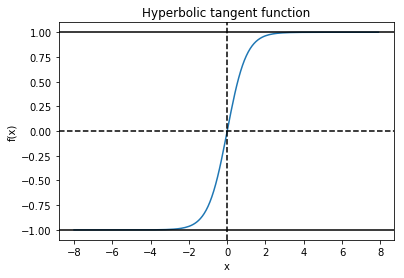

In [27]:
# the hyperbolic tangent function
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
x = np.arange(-8, 8, 0.1)
f = np.tanh(x)
plt.plot(x, f)
plt.axvline(x=0, ls = "--", c = 'black')
plt.axhline(y=0, ls = "--",c = 'black')
plt.axhline(y=1, c = 'black')
plt.axhline(y=-1, c = 'black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Hyperbolic tangent function')
plt.show()

The problem with the above activation functions is that the derivative for $z$ very large or very small are close to zero in both cases, and this slows down gradient discent. A very common activation funcion is the *Rectified Linear Unit (ReLU)* function $a = \max\{0,z\}$, which has derivative equal to 1 when $z>0$. To avoid the negative derivative, an alternative is the *Leaky ReLU* function $a =  \max\{0.01z,z\}$

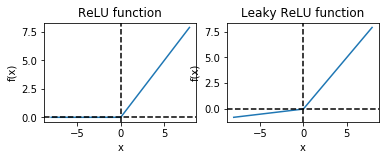

In [59]:
# ReLU and Leaky ReLU functions
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
x = np.arange(-8, 8, 0.1)

plt.figure(1)
plt.subplot(2,2,1)
f = np.maximum(0,x)
plt.plot(x, f)
plt.axvline(x=0, ls = "--", c = 'black')
plt.axhline(y=0, ls = "--",c = 'black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('ReLU function')
plt.subplot(2,2,2)
f = np.maximum(0.1*x,x)
plt.plot(x, f)
plt.axvline(x=0, ls = "--", c = 'black')
plt.axhline(y=0, ls = "--",c = 'black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Leaky ReLU function')
plt.show()

If you use a linear activation function then the neural network is just outputting a linear function of the input. If you use a linear activation function then no matter how many layers your neural network has, all it's doing is just computing a linear activation function. So you might as well not have any hidden layers.

### Backpropagation

To compute the derivatives with respect to the parameters, consider the following schema:
* $x_i$, with dimension $n_x \times 1$
* $w^{[1]}$, with dimension $n^{[1]} \times n_x$
* $b^{[1]}$, with dimension $n^{[1]} \times 1$
* $z^{[1]} = w^{[1]} x_i + b^{[1]}$, with dimension $n^{[1]} \times 1$
* $a^{[1]} = g(z^{[1]})$, with dimension $n^{[1]} \times 1$
* $w^{[2]}$, with dimension $1 \times n^{[1]}$
* $b^{[2]}$, with dimension $1 \times 1$
* $z^{[2]} = w^{[2]}a^{[1]}+b^{[2]}$, with dimension $1 \times 1$
* $a^{[2]} = \sigma(z^{[2]})$, with dimension $1 \times 1$
* $L(a^{[2]},y_i)$, with dimension $1 \times 1$

Therefore$^*$

$\frac{\partial J(.)}{\partial w^{[1]}} = \frac{\partial L(.)}{\partial a^{[2]}} \frac{\partial a^{[2]}}{\partial z^{[2]}} \frac{\partial z^{[2]}}{\partial a^{[1]}} \frac{\partial a^{[1]}}{\partial z^{[1]}} \frac{\partial z^{[1]}}{\partial w^{[1]}}$

Such that 
* $\partial z^{[2]} = a^{[2]} - y$
* $\partial w^{[2]} = \partial z^{[2]} a^{[1]T}$ (dimension $1 \times n^{[1]}$)
* $\partial b^{[2]} = \partial z^{[2]}$
* $\partial z^{[1]} =\partial z^{[2]} \frac{\partial z^{[2]}}{\partial a^{[1]}} \frac{\partial a^{[1]}}{\partial z^{[1]}} = \partial z^{[2]} w^{[2]T} g'(z^{[1]})$ (dimension $n^{[1]} \times 1$)
* $\partial w^{[1]} = \partial z^{[1]} x_i^T$ (dimension $n^{[1]} \times n_x$)
* $\partial b^{[1]} = \partial z^{[1]}$

$^*$ To be more formal, with $m$ observations remember that the cost function $J(.)$ is the mean of the loss function $L(.)$, hence $\partial w^{[l]} = \frac{1}{m} \partial z^{[l]} a^{[l-1]T}$ and $\partial b^{[l]} = \frac{1}{m} \sum \partial z^{[l]}$.

### Random Initialization

If you initialize the gradient descent algorithm by choosing $w^{[1]}$ as a zero matrix then the hidden units/nodes will be the same.

The solution to this is to initialize your parameters randomly. You can generate a gaussian random variable, usually multiplied by very small number, such as 0.01. But when you're training a very very deep neural network, then you might want to pick a different constant than 0.01 [next class' material]

# Week 4

## Deep Neural Network

### Why deep representations?

If you're building a system for face recognition or face detection, then the first layer of the neural network you can think of as maybe being a feature detector or an edge detector. A hidden unit may try to figure out where the edges of a particular orientation are in the image. And maybe another hidden unit might be trying to figure out where are the horizontal edges in the image. You can think of the first layer of the neural network as looking at the picture and trying to figure out where are the edges in the picture. Now, let's think about where the edges in this picture are by grouping together pixels to form edges. It can then detect the edges and group edges together to form parts of faces. So for example, you might have a low neuron trying to see if it's finding an eye, or a different neuron trying to find that part of the nose. And so by putting together lots of edges, it can start to detect different parts of faces. And then, finally, by putting together different parts of faces, like an eye or a nose or an ear or a chin, it can then try to recognize or detect different types of faces. So intuitively, you can think of the earlier layers of the neural network as detecting simple functions, like edges. And then composing them together in the later layers of a neural network so that it can learn more and more complex functions. These visualizations will make more sense when we talk about *convolutional nets*. And one technical detail of this visualization, the edge detectors are looking in relatively small areas of an image, maybe very small regions like that. And then the facial detectors you can look at maybe much larger areas of image. But the main intuition you take away from this is just finding simple things like edges and then building them up. Composing them together to detect more complex things like an eye or a nose then composing those together to find even more complex things. And this type of simple to complex hierarchical representation, or compositional representation, applies in other types of data than images and face recognition as well. 

For example, if you're trying to build a speech recognition system, it's hard to revisualize speech but if you input an audio clip then maybe the first level of a neural network might learn to detect low level audio wave form features, such as is this tone going up? Is it going down? Is it white noise or sniffling sound. And what is the pitch? When it comes to that, detect low level wave form features like that. And then by composing low level wave forms, maybe you'll learn to detect basic units of sound. In linguistics they call phonemes. But, for example, in the word cat, the C is a phoneme, the A is a phoneme, the T is another phoneme. But learns to find maybe the basic units of sound and then composing that together maybe learn to recognize words in the audio. And then maybe compose those together, in order to recognize entire phrases or sentences. So deep neural network with multiple hidden layers might be able to have the earlier layers learn these lower level simple features and then have the later deeper layers then put together the simpler things it's detected in order to detect more complex things like recognize specific words or even phrases or sentences. The uttering in order to carry out speech recognition. And what we see is that whereas the other layers are computing, what seems like relatively simple functions of the input such as where the edge is, by the time you get deep in the network you can actually do surprisingly complex things. Such as detect faces or detect words or phrases or sentences.

### Forward and Backward Propagation

* Forward propagation:
    * input $a^{[l-1]}$
    * output $a^{[l]}$ and cache $z^{[l]}, a^{[l-1]}$ (and $W^{[l]}, b^{[l]}$)
* Backward propagation:
    * input $da^{[l]}$
    * output $da^{[l-1]}, dW^{[l-1]}, db^{[l-1]}$
    
where
- $dz^{[l]} = da^{[l]} * g^{[l]'}(z^{[l]})$, element-wise product
- $dW^{[l]} = dz^{[l]} a^{[l-1]}$ (or $\frac{1}{m}dZ^{[l]} A^{[l-1]T}$ with $m$ observations)
- $db^{[l]} = dz^{[l]}$ (or $\frac{1}{m} \sum dZ^{[l]}$ with $m$ observations)
- $da^{[l-1]} = W^{[l]T} dz^{[l]}$

### Parameters vs Hyperparameters

Hyperparameters:
* The learning rate $\alpha$
* The number of iterations of gradient descent
* The number of layers
* The number of units in each layer
* The activation function